# Modelizado mediante redes neuronales - Clasificación

En este cuaderno modelizamos la distribucion de los distintos partidos de izquierda en las elecciones de diciembre de 2015. Agrupamos por un lado a Podemos e IU, y por otro al PSOE. En vez de diferencia de porcentajes sin más, aplicaremos un modelo de clasificación según esta variable.

La modelizació la llevareamos a cabo mediante redes neuronales en dos casos, una más simple y otra algo más compleja. 

El proceso será el común: definición de la columna variable, seguida de tratamiento de los datasets train y test. Posteriormente ajustaremos los modelos con las dos redes neuronales. 

## Definición de la variable objetivo

Comenzamos por la carga de librerías y el dataset de las elecciones de 2015.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

import warnings
warnings.filterwarnings('ignore')

In [ ]:
strings = {'Sección' : 'str', 'cod_ccaa' : 'str', 'cod_prov' : 'str', 'cod_mun' : 'str', 'cod_sec' : 'str'}

In [ ]:
df_eleccion = pd.read_csv('/content/drive/MyDrive/Proyecto_KeepCoding - Propio/Data/Gen-15-Dic/gen_D15_unif_cols_prov.txt', dtype = strings)

In [ ]:
df_eleccion

,Sección,cod_ccaa,cod_prov,cod_mun,cod_sec,CCAA,Provincia,Municipio,Censo_Esc,Votos_Total,Participación,Nulos,Votos_Válidos,Blanco,V_Cand,PP,PSOE,Cs,UP,IU,VOX,UPyD,MP,CiU,ERC,JxC,CUP,DiL,PNV,Bildu,Amaiur,CC,FA,TE,BNG,PRC,GBai,Compromis,PACMA,Otros,...,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100 y más,Población Total,Hombres,Mujeres,% mayores 65 años,% 20-64 años,% menores 19 años,Afiliados SS Minicipio,% Afiliados SS autónomos,% Afiliados SS / Población,Paro Registrado Municipio,% Paro Hombres,% Paro mayores 45,% Paro s/ Afiliados SS Municipio,Renta persona 2017,Renta persona 2015,Renta hogar 2017,Renta hogar 2015,Renta Salarios 2018,Renta Salarios 2015,Renta Pensiones 2018,Renta Pensiones 2015,Renta Desempleo 2018,Renta Desempleo 2015,dict_res,dict_res_ord
0,022015121010400101001,01,04,04001,0400101001,Andalucía,Almería,ABLA,1083,812,0.749769,16,796,6,790,249,364,78,76,10,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,...,75.0,96.0,83.0,97.0,99.0,91.0,83.0,75.0,61.0,78.0,86.0,42.0,13.0,1.0,0.0,1342.0,689.0,653.0,0.265276,0.583458,0.151267,270.0,0.281481,0.201192,171.0,0.520468,0.549708,0.387755,9159.0,8788.0,20172.0,19546.0,5574.0,4833.0,3286.0,3082.0,403.0,471.0,"{'PP': 249, 'PSOE': 364, 'Cs': 78, 'UP': 76, '...","[('PSOE', 364), ('PP', 249), ('Cs', 78), ('UP'..."
1,022015121010400201001,01,04,04002,0400201001,Andalucía,Almería,ABRUCENA,1063,765,0.719661,5,760,1,759,212,379,73,77,14,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,...,81.0,81.0,69.0,112.0,93.0,96.0,104.0,64.0,68.0,78.0,76.0,31.0,9.0,1.0,0.0,1279.0,656.0,623.0,0.255668,0.617670,0.126661,359.0,0.231198,0.280688,211.0,0.417062,0.654028,0.370175,8827.0,8107.0,17841.0,17115.0,4640.0,4048.0,3418.0,2770.0,568.0,620.0,"{'PP': 212, 'PSOE': 379, 'Cs': 73, 'UP': 77, '...","[('PSOE', 379), ('PP', 212), ('UP', 77), ('Cs'..."
2,022015121010400301001,01,04,04003,0400301001,Andalucía,Almería,ADRA,668,509,0.761976,13,496,5,491,252,108,46,61,18,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,1,...,55.0,60.0,60.0,78.0,77.0,71.0,47.0,42.0,44.0,32.0,24.0,4.0,3.0,0.0,1.0,882.0,432.0,450.0,0.170068,0.643991,0.185941,7506.0,0.374367,8.510204,2959.0,0.489355,0.444069,0.282752,8965.0,8267.0,26498.0,24688.0,5121.0,4795.0,2499.0,2301.0,337.0,333.0,"{'PP': 252, 'PSOE': 108, 'Cs': 46, 'UP': 61, '...","[('PP', 252), ('PSOE', 108), ('UP', 61), ('Cs'..."
3,022015121010400301002,01,04,04003,0400301002,Andalucía,Almería,ADRA,1248,848,0.679487,8,840,8,832,372,212,120,106,19,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,...,147.0,170.0,146.0,127.0,133.0,119.0,72.0,51.0,42.0,36.0,16.0,15.0,3.0,1.0,0.0,1668.0,824.0,844.0,0.098321,0.670264,0.231415,7506.0,0.374367,4.500000,2959.0,0.489355,0.444069,0.282752,8599.0,7941.0,25677.0,23400.0,5381.0,4837.0,1815.0,1724.0,343.0,464.0,"{'PP': 372, 'PSOE': 212, 'Cs': 120, 'UP': 106,...","[('PP', 372), ('PSOE', 212), ('Cs', 120), ('UP..."
4,022015121010400301003,01,04,04003,0400301003,Andalucía,Almería,ADRA,1432,919,0.641760,11,908,7,901,420,207,137,91,28,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,5,...,166.0,226.0,209.0,166.0,121.0,92.0,72.0,69.0,44.0,47.0,42.0,11.0,8.0,2.0,0.0,2073.0,998.0,1075.0,0.107574,0.646406,0.246020,7506.0,0.374367,3.620839,2959.0,0.489355,0.444069,0.282752,8076.0,7150.0,22051.0,19687.0,5224.0,4044.0,1170.0,1198.0,416.0,476.0,"{'PP': 420, 'PSOE': 207, 'Cs': 137, 'UP': 91, ...","[('PP', 420), ('PSOE', 207), ('Cs', 137), ('UP..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36212,022015121195200108011,19,52,52001,5200108011,Melilla,Melilla,MELILLA,1512,897,0.593254,12,885,13,872,372,192,174,101,0,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,21,...,163.0,159.0,170.0,148.0,175.0,177.0,110.0,68.0,36.0,31.0,28.0,18.0,6.0,2.0,1.0,2303.0,1154.0,1149.0,0.082501,0

Comprobamos los votos obtenidos por los partidos de izquierda, viendo que la suma de UP (Podemos en esa elección) e IU fue superior a la del PSOE.

In [ ]:
df_eleccion['UP'].sum()

5188803

In [ ]:
df_eleccion['IU'].sum()

878312

In [ ]:
df_eleccion['PSOE'].sum()

5530428

In [ ]:
df_eleccion.columns

Index(['Sección', 'cod_ccaa', 'cod_prov', 'cod_mun', 'cod_sec', 'CCAA',
       'Provincia', 'Municipio', 'Censo_Esc', 'Votos_Total', 'Participación',
       'Nulos', 'Votos_Válidos', 'Blanco', 'V_Cand', 'PP', 'PSOE', 'Cs', 'UP',
       'IU', 'VOX', 'UPyD', 'MP', 'CiU', 'ERC', 'JxC', 'CUP', 'DiL', 'PNV',
       'Bildu', 'Amaiur', 'CC', 'FA', 'TE', 'BNG', 'PRC', 'GBai', 'Compromis',
       'PACMA', 'Otros', '% PP', '% PSOE', '% UP', '% Vox', '% Cs', '% IU',
       'Ganador', 'Segundo', 'Tercero', 'Cuarto', 'Quinto', '0-4', '5-9',
       '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89',
       '90-94', '95-99', '100 y más', 'Población Total', 'Hombres', 'Mujeres',
       '% mayores 65 años', '% 20-64 años', '% menores 19 años',
       'Afiliados SS Minicipio', '% Afiliados SS autónomos',
       '% Afiliados SS / Población', 'Paro Registrado Municipio',
       '% Paro Hombres', '% Paro mayo

Definimos la columna variable de diferencia de porcentajes, luego la caracterizaremos.

In [ ]:
df_eleccion['Dif_Pod+IU_PSOE'] = df_eleccion['% UP'] + df_eleccion['% IU'] - df_eleccion['% PSOE'] 

Llevamos a cabo una pequeña inspección. La diferencia media de las secciones es casi cero, pero la mediana es positiva. Ello indicaría que el PSOE sale mejor parado en aquellas secciones de menor tamaño, más rurales, lo cual estaría de acuerdo con un voto menos permeable a los nuevos partidos. Es pura intuición, ciertamente.

In [ ]:
df_eleccion['Dif_Pod+IU_PSOE'].describe()

count    36215.000000
mean         0.004321
std          0.148662
min         -0.731343
25%         -0.070970
50%          0.030769
75%          0.103646
max          0.865385
Name: Dif_Pod+IU_PSOE, dtype: float64

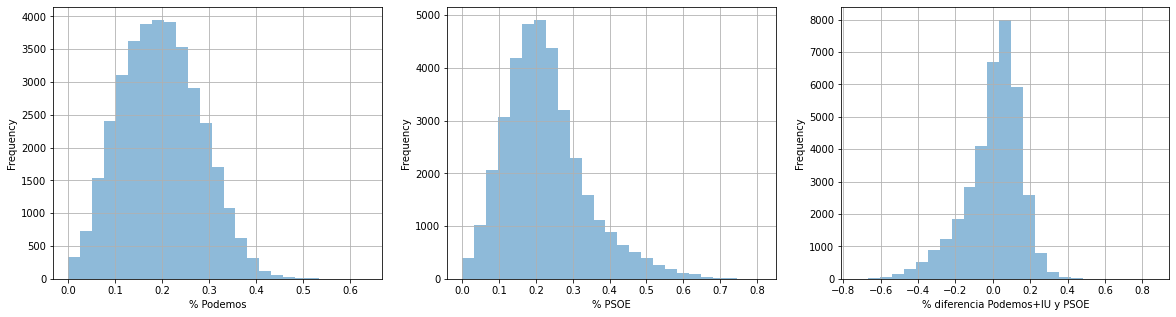

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1,3,1)
df_eleccion['% UP'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
plt.xlabel('% Podemos')

plt.subplot(1,3,2)
df_eleccion['% PSOE'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('% PSOE')

plt.subplot(1,3,3)
df_eleccion['Dif_Pod+IU_PSOE'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('% diferencia Podemos+IU y PSOE')

plt.show()

Ahora aplicamos el método qcut para ver el entorno que podrían tener los bins de la variable objetivo para obtener cinco grupos más o menos iguales.

In [ ]:
pd.qcut(np.array(df_eleccion['Dif_Pod+IU_PSOE']), 5)

[(-0.732, -0.104], (-0.732, -0.104], (-0.104, 0.0], (-0.104, 0.0], (-0.104, 0.0], ..., (-0.104, 0.0], (-0.104, 0.0], (-0.104, 0.0], (-0.732, -0.104], (-0.732, -0.104]]
Length: 36217
Categories (5, interval[float64]): [(-0.732, -0.104] < (-0.104, 0.0] < (0.0, 0.0594] < (0.0594, 0.121] <
                                    (0.121, 0.865]]

Con estos intervalos definimos la función que asignará finalmente la variable objetivo como clasificación de 0 a 4.

In [ ]:
def categoria(x):
  if x < -0.10:
    return 0

  if x < 0.0:
    return 1

  if x < 0.06:
    return 2

  if x < 0.12:
    return 3

  return 4

Inicializamos la columna objetivo con valores externos a la clasificación, y después aplicamos la función. Comprobamos que tenemos 5 grupos bastante nivelados.

In [ ]:
df_eleccion['Dif_Pod+IU_PSOE_cat'] = 5

In [ ]:
for ind in range(len(df_eleccion['Dif_Pod+IU_PSOE_cat'])):

  df_eleccion['Dif_Pod+IU_PSOE_cat'][ind] = categoria(df_eleccion['Dif_Pod+IU_PSOE'][ind])


In [ ]:
df_eleccion['Dif_Pod+IU_PSOE_cat'].value_counts()

0    7422
2    7355
4    7317
3    7108
1    7015
Name: Dif_Pod+IU_PSOE_cat, dtype: int64

Hamos un describe del dataset, viendo que no hay demasiados valores nan.

In [ ]:
df_eleccion.describe()

,Censo_Esc,Votos_Total,Participación,Nulos,Votos_Válidos,Blanco,V_Cand,PP,PSOE,Cs,UP,IU,VOX,UPyD,MP,CiU,ERC,JxC,CUP,DiL,PNV,Bildu,Amaiur,CC,FA,TE,BNG,PRC,GBai,Compromis,PACMA,Otros,% PP,% PSOE,% UP,% Vox,% Cs,% IU,0-4,5-9,...,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100 y más,Población Total,Hombres,Mujeres,% mayores 65 años,% 20-64 años,% menores 19 años,Afiliados SS Minicipio,% Afiliados SS autónomos,% Afiliados SS / Población,Paro Registrado Municipio,% Paro Hombres,% Paro mayores 45,% Paro s/ Afiliados SS Municipio,Renta persona 2017,Renta persona 2015,Renta hogar 2017,Renta hogar 2015,Renta Salarios 2018,Renta Salarios 2015,Renta Pensiones 2018,Renta Pensiones 2015,Renta Desempleo 2018,Renta Desempleo 2015,Dif_Pod+IU_PSOE,Dif_Pod+IU_PSOE_cat
count,36217.000000,36217.000000,36216.000000,36217.000000,36217.000000,36217.000000,36217.000000,36217.000000,36217.000000,36217.000000,36217.000000,36217.000000,36217.000000,36217.000000,36217.0,36217.0,36217.000000,36217.0,36217.0,36217.000000,36217.000000,36217.000000,36217.0,36217.000000,36217.0,36217.0,36217.0,36217.0,36217.000000,36217.0,36217.000000,36217.000000,36215.000000,36215.000000,36215.000000,36215.000000,36215.000000,36215.000000,36202.000000,36202.000000,...,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,36202.000000,3.618500e+04,36185.000000,36173.000000,36204.000000,36204.000000,36204.000000,36183.000000,36207.000000,36207.000000,36207.000000,36207.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,33918.000000,36215.000000,36217.000000
mean,956.192562,698.742221,0.731872,6.260623,692.481597,5.182511,687.299086,199.244112,152.702543,96.641439,143.269818,24.251374,1.592926,4.255791,0.0,0.0,16.549549,0.0,0.0,15.620896,8.327305,6.031781,0.0,2.257227,0.0,0.0,0.0,0.0,0.843637,0.0,6.046995,10.859044,0.304445,0.226059,0.196418,0.002184,0.129707,0.033962,61.602039,68.539611,...,91.896939,110.169825,107.953152,102.147616,94.217005,82.253190,69.184769,65.012734,53.689962,42.731755,39.287028,23.580548,9.814872,2.164162,0.399812,1287.279322,631.987183,655.292139,0.213761,0.607404,0.178835,1.927427e+05,0.248503,159.065925,33547.354574,0.465898,0.484704,0.262021,11493.584633,10861.569430,29423.403301,27983.539236,8278.306974,7284.196605,3193.418692,2950.068628,289.544709,346.405952,0.004321,1.996769
std,433.054305,328.701517,0.074144,5.117600,326.094610,4.011331,323.749419,131.015322,98.246128,74.635548,94.819006,26.685661,3.106432,5.395636,0.0,0.0,50.923972,0.0,0.0,51.900376,42.921707,30.640431,0.0,15.659671,0.0,0.0,0.0,0.0,8.962590,0.0,4.998708,20.158663,0.148450,0.111624,0.083933,0.004285,0.060111,0.031143,50.027524,52.143540,...,61.828803,77.289546,71.079345,59.615928,50.631469,44.306774,39.595889,41.136862,34.628479,25.520707,22.530694,14.997599,7.564482,2.355280,0.770458,644.801688,322.639138,325.292424,0.097388,0.055418,0.060363,4.659022e+05,0.165351,412.762514,66920.786756,0.087522,0.093064,0.114567,3636.168592,3532.802884,10027.357328,9698.869362,3540.303053,3386.592439,1395.917626,1254.803232,119.779232,118.814588,0.148662,1.420512
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,2.000000,0.000000,0.234568,0.000000,2.000000e+00,0.000000,0.019417,0.000000,0.000000,0.000000,0.000000,3431.000000,3281.000000,12087.000000,11388.000000,1767.000000,1349.000000,345.000000,476.000000,71.000000

In [ ]:
df_eleccion.dtypes

Sección                  object
cod_ccaa                 object
cod_prov                 object
cod_mun                  object
cod_sec                  object
                         ...   
Renta Desempleo 2015    float64
dict_res                 object
dict_res_ord             object
Dif_Pod+IU_PSOE         float64
Dif_Pod+IU_PSOE_cat       int64
Length: 99, dtype: object

## Dataset Train

Ahora procedemos a la división del dataset entre train y test, quedándonos como es habitual con el de train.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_eleccion, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardamos
train.to_csv('/content/drive/MyDrive/Proyecto_KeepCoding - Propio/Data/Gen-15-Dic/train_set_RN_pc_PodIU_PSOE_D15.txt', index=False)
test.to_csv('/content/drive/MyDrive/Proyecto_KeepCoding - Propio/Data/Gen-15-Dic/test_set_RN_pc_PodIU_PSOE_D15.txt', index=False)

# A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él. 

df_train = pd.read_csv('/content/drive/MyDrive/Proyecto_KeepCoding - Propio/Data/Gen-15-Dic/train_set_RN_pc_PodIU_PSOE_D15.txt',  dtype = strings)

Dimensiones del dataset de training: (28973, 99)
Dimensiones del dataset de test: (7244, 99)


In [ ]:
df_train

,Sección,cod_ccaa,cod_prov,cod_mun,cod_sec,CCAA,Provincia,Municipio,Censo_Esc,Votos_Total,Participación,Nulos,Votos_Válidos,Blanco,V_Cand,PP,PSOE,Cs,UP,IU,VOX,UPyD,MP,CiU,ERC,JxC,CUP,DiL,PNV,Bildu,Amaiur,CC,FA,TE,BNG,PRC,GBai,Compromis,PACMA,Otros,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100 y más,Población Total,Hombres,Mujeres,% mayores 65 años,% 20-64 años,% menores 19 años,Afiliados SS Minicipio,% Afiliados SS autónomos,% Afiliados SS / Población,Paro Registrado Municipio,% Paro Hombres,% Paro mayores 45,% Paro s/ Afiliados SS Municipio,Renta persona 2017,Renta persona 2015,Renta hogar 2017,Renta hogar 2015,Renta Salarios 2018,Renta Salarios 2015,Renta Pensiones 2018,Renta Pensiones 2015,Renta Desempleo 2018,Renta Desempleo 2015,dict_res,dict_res_ord,Dif_Pod+IU_PSOE,Dif_Pod+IU_PSOE_cat
0,022015121063900901001,06,39,39009,3900901001,Cantabria,Cantabria,BÁRCENA DE CICERO,1173,871,0.742540,12,859,5,854,369,154,119,165,28,5,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,2,...,159.0,118.0,91.0,84.0,77.0,91.0,59.0,36.0,35.0,31.0,15.0,3.0,0.0,1472.0,783.0,689.0,0.183424,0.644022,0.172554,1735.0,0.209222,1.178668,494.0,0.500000,0.425101,0.221624,11170.0,10517.0,26476.0,24740.0,8024.0,7106.0,2988.0,2928.0,347.0,401.0,"{'PP': 369, 'PSOE': 154, 'Cs': 119, 'UP': 165,...","[('PP', 369), ('UP', 165), ('PSOE', 154), ('Cs...",0.045402,2
1,022015121122807919037,12,28,28079,2807919037,Galicia,Madrid,MADRID,1666,1398,0.839136,7,1391,9,1382,301,276,235,389,128,6,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,5,...,131.0,264.0,334.0,193.0,103.0,62.0,44.0,41.0,29.0,25.0,11.0,5.0,0.0,2148.0,1026.0,1122.0,0.101024,0.663873,0.235102,1795038.0,0.098768,835.678771,263008.0,0.468640,0.502452,0.127795,16110.0,14907.0,45646.0,42899.0,15144.0,14541.0,2571.0,1928.0,263.0,285.0,"{'PP': 301, 'PSOE': 276, 'Cs': 235, 'UP': 389,...","[('UP', 389), ('PP', 301), ('PSOE', 276), ('Cs...",0.173257,4
2,022015121090826001009,09,08,08260,0826001009,Cataluña,Barcelona,SANTA PERPÈTUA DE MOGODA,1972,1532,0.776876,4,1528,3,1525,163,256,275,509,0,0,11,0,0,175,0,0,90,0,0,0,0,0,0,0,0,0,0,20,26,...,155.0,192.0,244.0,230.0,188.0,135.0,65.0,46.0,23.0,11.0,7.0,2.0,1.0,2387.0,1202.0,1185.0,0.121491,0.689150,0.189359,14003.0,0.121688,5.866359,2335.0,0.443683,0.505353,0.142918,14435.0,13501.0,38638.0,36616.0,12434.0,11175.0,3322.0,2757.0,315.0,328.0,"{'PP': 163, 'PSOE': 256, 'Cs': 275, 'UP': 509,...","[('UP', 509), ('Cs', 275), ('PSOE', 256), ('ER...",0.165576,4
3,022015121122807913204,12,28,28079,2807913204,Galicia,Madrid,MADRID,1165,1011,0.867811,4,1007,7,1000,141,194,153,382,116,0,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,...,96.0,214.0,207.0,133.0,73.0,44.0,23.0,31.0,19.0,12.0,1.0,1.0,0.0,1518.0,729.0,789.0,0.086298,0.661397,0.252306,1795038.0,0.098768,1182.501976,263008.0,0.468640,0.502452,0.127795,12582.0,11793.0,35438.0,33362.0,11704.0,10733.0,2356.0,1629.0,250.0,326.0,"{'PP': 141, 'PSOE': 194, 'Cs': 153, 'UP': 382,...","[('UP', 382), ('PSOE', 194), ('Cs', 153), ('PP...",0.301887,4
4,022015121153002701040,15,30,30027,3002701040,Navarra,Murcia,MOLINA DE SEGURA,1166,912,0.782161,9,903,3,900,312,89,246,207,25,3,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,4,...,174.0,149.0,110.0,81.0,48.0,31.0,25.0,5.0,9.0,5.0,2.0,0.0,0.0,1703.0,877.0,826.0,0.045214,0.650029,0.304756,22263.0,0.205004,13.072813,8111.0,0.396129,0.439403,0.267038,12031.0,11213.0,37321.0,34520.0,11573.0,10881.0,975.0,928.0,273.0,261.0,"{'PP': 312, 'PSOE': 89, 'Cs': 246, 'UP': 207, ...","[('PP', 312), ('Cs', 246), ('UP', 207), ('PSOE...",0.158361,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28968,022015121094300901001,09,43,43009,4300901001,Cataluña,Tarragona,ALFORJA,1431,968,0.676450,10,958,5,953,52,120,82,194,0,0,3,0,0,266,0,0,19

Lógicamente, la variable objetivo está también nivelada en el train.

In [ ]:
df_train['Dif_Pod+IU_PSOE_cat'].value_counts()

0    5982
4    5880
2    5847
3    5701
1    5563
Name: Dif_Pod+IU_PSOE_cat, dtype: int64

In [ ]:
cols_iniciales = df_train.columns

In [ ]:
cols_iniciales

Index(['Sección', 'cod_ccaa', 'cod_prov', 'cod_mun', 'cod_sec', 'CCAA',
       'Provincia', 'Municipio', 'Censo_Esc', 'Votos_Total', 'Participación',
       'Nulos', 'Votos_Válidos', 'Blanco', 'V_Cand', 'PP', 'PSOE', 'Cs', 'UP',
       'IU', 'VOX', 'UPyD', 'MP', 'CiU', 'ERC', 'JxC', 'CUP', 'DiL', 'PNV',
       'Bildu', 'Amaiur', 'CC', 'FA', 'TE', 'BNG', 'PRC', 'GBai', 'Compromis',
       'PACMA', 'Otros', '% PP', '% PSOE', '% UP', '% Vox', '% Cs', '% IU',
       'Ganador', 'Segundo', 'Tercero', 'Cuarto', 'Quinto', '0-4', '5-9',
       '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89',
       '90-94', '95-99', '100 y más', 'Población Total', 'Hombres', 'Mujeres',
       '% mayores 65 años', '% 20-64 años', '% menores 19 años',
       'Afiliados SS Minicipio', '% Afiliados SS autónomos',
       '% Afiliados SS / Población', 'Paro Registrado Municipio',
       '% Paro Hombres', '% Paro mayo

Nos quedamos con el conjunto de variables que consideramos más importante, fundamentalmente las de edades y cuestiones sociales, descartando las de los votos a partidos, para no hacernos trampas en el solitario.

In [ ]:
cols_validas = ['Provincia',
        'Censo_Esc', 'Participación',
        '0-4', '5-9',
       '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89',
       '90-94', '95-99', '100 y más', 'Población Total', 'Hombres', 'Mujeres',
       '% mayores 65 años', '% 20-64 años', '% menores 19 años',
       'Afiliados SS Minicipio', '% Afiliados SS autónomos',
       '% Afiliados SS / Población', 'Paro Registrado Municipio',
       '% Paro Hombres', '% Paro mayores 45',
       '% Paro s/ Afiliados SS Municipio', 'Renta persona 2017',
       'Renta persona 2015', 'Renta hogar 2017', 'Renta hogar 2015',
       'Renta Salarios 2018', 'Renta Salarios 2015', 'Renta Pensiones 2018',
       'Renta Pensiones 2015', 'Renta Desempleo 2018', 'Renta Desempleo 2015',
       'Dif_Pod+IU_PSOE_cat']

In [ ]:
df_train = df_train[cols_validas]

In [ ]:
df_train

,Provincia,Censo_Esc,Participación,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100 y más,Población Total,Hombres,Mujeres,% mayores 65 años,% 20-64 años,% menores 19 años,Afiliados SS Minicipio,% Afiliados SS autónomos,% Afiliados SS / Población,Paro Registrado Municipio,% Paro Hombres,% Paro mayores 45,% Paro s/ Afiliados SS Municipio,Renta persona 2017,Renta persona 2015,Renta hogar 2017,Renta hogar 2015,Renta Salarios 2018,Renta Salarios 2015,Renta Pensiones 2018,Renta Pensiones 2015,Renta Desempleo 2018,Renta Desempleo 2015,Dif_Pod+IU_PSOE_cat
0,Cantabria,1173,0.742540,90.0,68.0,52.0,44.0,57.0,58.0,124.0,180.0,159.0,118.0,91.0,84.0,77.0,91.0,59.0,36.0,35.0,31.0,15.0,3.0,0.0,1472.0,783.0,689.0,0.183424,0.644022,0.172554,1735.0,0.209222,1.178668,494.0,0.500000,0.425101,0.221624,11170.0,10517.0,26476.0,24740.0,8024.0,7106.0,2988.0,2928.0,347.0,401.0,2
1,Madrid,1666,0.839136,53.0,83.0,175.0,194.0,149.0,86.0,84.0,82.0,131.0,264.0,334.0,193.0,103.0,62.0,44.0,41.0,29.0,25.0,11.0,5.0,0.0,2148.0,1026.0,1122.0,0.101024,0.663873,0.235102,1795038.0,0.098768,835.678771,263008.0,0.468640,0.502452,0.127795,16110.0,14907.0,45646.0,42899.0,15144.0,14541.0,2571.0,1928.0,263.0,285.0,4
2,Barcelona,1972,0.776876,72.0,91.0,127.0,162.0,197.0,176.0,118.0,145.0,155.0,192.0,244.0,230.0,188.0,135.0,65.0,46.0,23.0,11.0,7.0,2.0,1.0,2387.0,1202.0,1185.0,0.121491,0.689150,0.189359,14003.0,0.121688,5.866359,2335.0,0.443683,0.505353,0.142918,14435.0,13501.0,38638.0,36616.0,12434.0,11175.0,3322.0,2757.0,315.0,328.0,4
3,Madrid,1165,0.867811,39.0,60.0,115.0,169.0,90.0,70.0,57.0,64.0,96.0,214.0,207.0,133.0,73.0,44.0,23.0,31.0,19.0,12.0,1.0,1.0,0.0,1518.0,729.0,789.0,0.086298,0.661397,0.252306,1795038.0,0.098768,1182.501976,263008.0,0.468640,0.502452,0.127795,12582.0,11793.0,35438.0,33362.0,11704.0,10733.0,2356.0,1629.0,250.0,326.0,4
4,Murcia,1166,0.782161,163.0,157.0,108.0,91.0,79.0,78.0,181.0,207.0,174.0,149.0,110.0,81.0,48.0,31.0,25.0,5.0,9.0,5.0,2.0,0.0,0.0,1703.0,877.0,826.0,0.045214,0.650029,0.304756,22263.0,0.205004,13.072813,8111.0,0.396129,0.439403,0.267038,12031.0,11213.0,37321.0,34520.0,11573.0,10881.0,975.0,928.0,273.0,261.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28968,Tarragona,1431,0.676450,81.0,98.0,82.0,88.0,104.0,105.0,112.0,150.0,155.0,134.0,161.0,142.0,88.0,104.0,68.0,50.0,80.0,46.0,26.0,9.0,0.0,1883.0,956.0,927.0,0.203399,0.611259,0.185343,274.0,0.419708,0.145512,164.0,0.439024,0.585366,0.374429,10270.0,10710.0,25579.0,27497.0,9301.0,8022.0,2803.0,2467.0,327.0,393.0,3
28969,Murcia,756,0.832011,86.0,143.0,99.0,75.0,32.0,38.0,41.0,94.0,158.0,114.0,85.0,49.0,36.0,15.0,18.0,11.0,10.0,4.0,0.0,0.0,0.0,1108.0,558.0,550.0,0.052347,0.583935,0.363718,190733.0,0.149969,172.141697,48013.0,0.450357,0.433778,0.201105,15695.0,16364.0,51051.0,52099.0,16947.0,16157.0,1366.0,1214.0,220.0,206.0,3
28970,Vizcaya,809,0.772559,27.0,28.0,33.0,39.0,37.0,41.0,39.0,46.0,46.0,45.0,82.0,65.0,96.0,114.0,101.0,55.0,37.0,27.0,10.0,4.0,1.0,973.0,453.0,520.0,0.358684,0.510791,0.130524,169462.0,0.134195,174.164440,48884.0,0.466083,0.434989,0.223883,15951.0,15871.0,38332.0,39432.0,NaN,NaN,NaN,NaN,NaN,NaN,2
28971,Tarragona,1716,0.563520,173.0,174.0,109.0,105.0,134.0,253.0,368.0,389.0,325.0,251.0,214.0,193.0,201.0,152.0,103.0,54.0,42.0,22.0,8.0,2.0,0.0,3272.0,1739.0,1533.0,0.117054,0.711491,0.171455,7154.0,0.152083,2.186430,2763.0,0.450597,0.402099,0.278612,10123.0,9279.0,21397.0,19851.0,8119.0,6892.0,2348.0,1991.0,549.0,598.0,3


In [ ]:
df_train.dtypes

Provincia                            object
Censo_Esc                             int64
Participación                       float64
0-4                                 float64
5-9                                 float64
10-14                               float64
15-19                               float64
20-24                               float64
25-29                               float64
30-34                               float64
35-39                               float64
40-44                               float64
45-49                               float64
50-54                               float64
55-59                               float64
60-64                               float64
65-69                               float64
70-74                               float64
75-79                               float64
80-84                               float64
85-89                               float64
90-94                               float64
95-99                           

In [ ]:
df_train.describe()

,Censo_Esc,Participación,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100 y más,Población Total,Hombres,Mujeres,% mayores 65 años,% 20-64 años,% menores 19 años,Afiliados SS Minicipio,% Afiliados SS autónomos,% Afiliados SS / Población,Paro Registrado Municipio,% Paro Hombres,% Paro mayores 45,% Paro s/ Afiliados SS Municipio,Renta persona 2017,Renta persona 2015,Renta hogar 2017,Renta hogar 2015,Renta Salarios 2018,Renta Salarios 2015,Renta Pensiones 2018,Renta Pensiones 2015,Renta Desempleo 2018,Renta Desempleo 2015,Dif_Pod+IU_PSOE_cat
count,28973.000000,28972.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,28960.000000,2.895000e+04,28950.000000,28939.000000,28964.000000,28964.000000,28964.000000,28948.000000,28965.000000,28965.000000,28965.000000,28965.000000,27140.000000,27140.000000,27140.000000,27140.000000,27140.000000,27140.00000,28973.000000
mean,957.111172,0.731855,61.674965,68.719095,63.889261,59.662707,65.116160,74.474033,91.943612,110.347721,108.265262,102.419786,94.376554,82.409599,69.304972,65.151727,53.757390,42.685808,39.194441,23.494993,9.781941,2.160843,0.399620,1289.230490,632.968232,656.262258,0.213529,0.607464,0.179007,1.926734e+05,0.248152,158.612658,33579.061697,0.465604,0.484827,0.262446,11493.845799,10864.097341,29432.597709,27995.070089,8285.209988,7289.676690,3191.196647,2948.440939,289.701322,346.58595,1.997722
std,433.361408,0.074182,50.106593,52.243703,45.108444,37.919423,37.713434,42.995661,61.537117,77.540184,71.410516,59.926646,50.954220,44.560056,39.898809,41.825757,35.175508,25.687145,22.474320,14.959816,7.562788,2.369264,0.772874,647.574271,323.955062,326.739786,0.097493,0.055398,0.060412,4.658632e+05,0.165121,411.432109,66939.186429,0.087644,0.093161,0.114738,3642.120430,3538.354566,10050.875354,9717.907433,3549.273105,3393.061665,1398.641284,1258.039503,119.933345,119.12432,1.423553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,3.000000,2.000000,0.000000,0.234568,0.000000,2.000000e+00,0.000000,0.019417,0.000000,0.000000,0.000000,0.000000,3431.000000,3281.000000,12087.000000,11388.000000,1767.000000,1349.000000,345.000000,476.000000,71.000000,81.00000,0.000000
25%,691.000000,0.691381,30.000000,34.000000,34.000000,34.000000,40.000000,47.000000,55.000000,62.000000,62.000000,64.000000,62.000000,54.000000,44.000000,42.000000,34.000000,27.000000,23.000000,12.000000,4.000000,1.000000,0.000000,898.000000,433.000000,462.000000,0.149174,0.579896,0.143959,1.722500e+03,0.131826,1.206106,714.000000,0.440733,0.444783,0.183446,9083.000000,8501.000000,23209.000000,21864.000000,5939.000000,5019.500000,2230.000000,2077.000000,216.000000,273.75000,1.000000
50%,953.000000,0.738088,51.000000,57.000000,55.000000,55.000000,62.000000,71.000000,83.000000,97.000000,96.000000,95.000000,89.000000,79.000000,66.000000,62.000000,51.000000,41.000000,38.000000,21.000000,8.000000,2.000000,0.000000,1260.000000,611.000000,647.000000,0.203632,0.612585,0.179376,1.306700e+04,0.193818,8.742409,5278.000000,0.459241,0.481749,0.248905,10912.000000,10273.000000,27553.000000,26099.000000,7710.500000,6719.000000,3003.500000,2791.000000,268.000000,335.00000,2.000000
75%,1239.000000,0.781250,81.000000,92.000000,86.000000,81.000000,87.000000,98.000000,119.000000,143.000000,142.000000,134.000000,123.000000,108.000000,91.000000,85.000000,70.000000,56.000000,53.000000,32.000000,13.000000,3.000000,1.000000,1674.000000,823.000000,855.000000,0.263957,0.641026,0.214677,8.882600e+04,0.310902,75.063099,25306.00000

Ahora toca rellenar los valores nan, que de todas formas son muy pocos.

In [ ]:
FillNA_num_mean = ['Censo_Esc', 'Participación',
        '0-4', '5-9',
       '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49',
       '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89',
       '90-94', '95-99', '100 y más', 'Población Total', 'Hombres', 'Mujeres',
       '% mayores 65 años', '% 20-64 años', '% menores 19 años',
       'Afiliados SS Minicipio', '% Afiliados SS autónomos',
       '% Afiliados SS / Población', 'Paro Registrado Municipio',
       '% Paro Hombres', '% Paro mayores 45',
       '% Paro s/ Afiliados SS Municipio', 'Renta persona 2017',
       'Renta persona 2015', 'Renta hogar 2017', 'Renta hogar 2015',
       'Renta Salarios 2018', 'Renta Salarios 2015', 'Renta Pensiones 2018',
       'Renta Pensiones 2015', 'Renta Desempleo 2018', 'Renta Desempleo 2015']

In [ ]:
for item in FillNA_num_mean:
        
    df_train[item].fillna(df_train[item].mean(), inplace=True)

In [ ]:
df_train.describe()

,Censo_Esc,Participación,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100 y más,Población Total,Hombres,Mujeres,% mayores 65 años,% 20-64 años,% menores 19 años,Afiliados SS Minicipio,% Afiliados SS autónomos,% Afiliados SS / Población,Paro Registrado Municipio,% Paro Hombres,% Paro mayores 45,% Paro s/ Afiliados SS Municipio,Renta persona 2017,Renta persona 2015,Renta hogar 2017,Renta hogar 2015,Renta Salarios 2018,Renta Salarios 2015,Renta Pensiones 2018,Renta Pensiones 2015,Renta Desempleo 2018,Renta Desempleo 2015,Dif_Pod+IU_PSOE_cat
count,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.00000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,2.897300e+04,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000
mean,957.111172,0.731855,61.674965,68.719095,63.889261,59.662707,65.116160,74.474033,91.943612,110.347721,108.265262,102.419786,94.376554,82.409599,69.304972,65.151727,53.757390,42.685808,39.194441,23.494993,9.781941,2.160843,0.39962,1289.230490,632.968232,656.262258,0.213529,0.607464,0.179007,1.926734e+05,0.248152,158.612658,33579.061697,0.465604,0.484827,0.262446,11493.845799,10864.097341,29432.597709,27995.070089,8285.209988,7289.676690,3191.196647,2948.440939,289.701322,346.585950,1.997722
std,433.361408,0.074181,50.095350,52.231981,45.098322,37.910915,37.704972,42.986013,61.523309,77.522786,71.394493,59.913200,50.942787,44.550058,39.889856,41.816372,35.167616,25.681381,22.469277,14.956460,7.561091,2.368732,0.77270,647.428968,323.882373,326.666472,0.097472,0.055386,0.060399,4.656782e+05,0.165056,411.190621,66928.788467,0.087630,0.093147,0.114688,3641.617548,3537.866012,10049.487591,9716.565644,3435.161031,3283.971919,1353.673807,1217.592489,116.077388,115.294374,1.423553
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.000000,3.000000,2.000000,0.000000,0.234568,0.000000,2.000000e+00,0.000000,0.019417,0.000000,0.000000,0.000000,0.000000,3431.000000,3281.000000,12087.000000,11388.000000,1767.000000,1349.000000,345.000000,476.000000,71.000000,81.000000,0.000000
25%,691.000000,0.691383,30.000000,34.000000,34.000000,34.000000,40.000000,47.000000,55.000000,62.000000,62.000000,64.000000,62.000000,54.000000,45.000000,42.000000,34.000000,27.000000,23.000000,12.000000,4.000000,1.000000,0.00000,898.000000,433.000000,462.000000,0.149194,0.579909,0.144000,1.725000e+03,0.131826,1.209270,714.000000,0.440733,0.444783,0.183446,9083.000000,8501.000000,23210.000000,21864.000000,6061.000000,5129.000000,2285.000000,2126.000000,219.000000,278.000000,1.000000
50%,953.000000,0.738082,51.000000,57.000000,55.000000,55.000000,62.000000,71.000000,83.000000,97.000000,96.000000,95.000000,89.000000,79.000000,66.000000,62.000000,51.000000,41.000000,38.000000,21.000000,8.000000,2.000000,0.00000,1260.000000,611.000000,647.000000,0.203681,0.612565,0.179331,1.306700e+04,0.194237,8.776999,5278.000000,0.459276,0.481749,0.249012,10914.000000,10275.000000,27554.000000,26104.000000,7855.336603,6845.948425,3122.000000,2898.000000,276.000000,343.000000,2.000000
75%,1239.000000,0.781250,81.000000,92.000000,86.000000,81.000000,87.000000,98.000000,119.000000,143.000000,142.000000,134.000000,123.000000,108.000000,91.000000,85.000000,70.000000,56.000000,53.000000,32.000000,13.000000,3.000000,1.00000,1674.000000,823.000000,855.000000,0.263889,0.641013,0.214669,8.882600e+04,0.310835,75.600130,25306.000000

Solo tenemos una variable no numérica, a la que aplicamos el método means para transformarla en numérica.

In [ ]:
categorical = ['Provincia']

In [ ]:
df_train['Provincia'].value_counts().sum()

28973

In [ ]:
mean_map1 = {}
for c in categorical:
    
    # df_filtered[c].fillna(df_filtered[c].mode()[0], inplace=True)
    
    mean = df_train.groupby(c)['Dif_Pod+IU_PSOE_cat'].mean()
    df_train[c] = df_train[c].map(mean)    
    mean_map1[c] = mean

In [ ]:
mean_map1

{'Provincia': Provincia
 Albacete                  0.461538
 Alicante                  2.324490
 Almería                   0.706199
 Asturias                  2.491254
 Badajoz                   0.290323
 Barcelona                 3.057064
 Burgos                    1.643011
 Cantabria                 1.611860
 Castellón                 2.221607
 Ceuta                     0.809524
 Ciudad Real               0.368421
 Cuenca                    0.435146
 Cáceres                   0.406250
 Cádiz                     1.673442
 Córdoba                   0.518145
 Gerona                    2.209412
 Gipúzcoa                  3.479358
 Granada                   0.922932
 Guadalajara               1.182692
 Huelva                    0.469799
 Huesca                    1.508929
 Islas Baleares            2.663480
 Jaén                      0.341346
 La Coruña                 2.374294
 La Rioja                  1.085502
 Las Palmas                2.590278
 León                      1.194070
 Lug

Ya tenemos todas las variables numéricas.

In [ ]:
df_train.dtypes

Provincia                           float64
Censo_Esc                             int64
Participación                       float64
0-4                                 float64
5-9                                 float64
10-14                               float64
15-19                               float64
20-24                               float64
25-29                               float64
30-34                               float64
35-39                               float64
40-44                               float64
45-49                               float64
50-54                               float64
55-59                               float64
60-64                               float64
65-69                               float64
70-74                               float64
75-79                               float64
80-84                               float64
85-89                               float64
90-94                               float64
95-99                           

In [ ]:
df_train.describe()

,Provincia,Censo_Esc,Participación,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100 y más,Población Total,Hombres,Mujeres,% mayores 65 años,% 20-64 años,% menores 19 años,Afiliados SS Minicipio,% Afiliados SS autónomos,% Afiliados SS / Población,Paro Registrado Municipio,% Paro Hombres,% Paro mayores 45,% Paro s/ Afiliados SS Municipio,Renta persona 2017,Renta persona 2015,Renta hogar 2017,Renta hogar 2015,Renta Salarios 2018,Renta Salarios 2015,Renta Pensiones 2018,Renta Pensiones 2015,Renta Desempleo 2018,Renta Desempleo 2015,Dif_Pod+IU_PSOE_cat
count,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.00000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,2.897300e+04,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000
mean,1.997722,957.111172,0.731855,61.674965,68.719095,63.889261,59.662707,65.116160,74.474033,91.943612,110.347721,108.265262,102.419786,94.376554,82.409599,69.304972,65.151727,53.757390,42.685808,39.194441,23.494993,9.781941,2.160843,0.39962,1289.230490,632.968232,656.262258,0.213529,0.607464,0.179007,1.926734e+05,0.248152,158.612658,33579.061697,0.465604,0.484827,0.262446,11493.845799,10864.097341,29432.597709,27995.070089,8285.209988,7289.676690,3191.196647,2948.440939,289.701322,346.585950,1.997722
std,0.947724,433.361408,0.074181,50.095350,52.231981,45.098322,37.910915,37.704972,42.986013,61.523309,77.522786,71.394493,59.913200,50.942787,44.550058,39.889856,41.816372,35.167616,25.681381,22.469277,14.956460,7.561091,2.368732,0.77270,647.428968,323.882373,326.666472,0.097472,0.055386,0.060399,4.656782e+05,0.165056,411.190621,66928.788467,0.087630,0.093147,0.114688,3641.617548,3537.866012,10049.487591,9716.565644,3435.161031,3283.971919,1353.673807,1217.592489,116.077388,115.294374,1.423553
min,0.290323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.000000,3.000000,2.000000,0.000000,0.234568,0.000000,2.000000e+00,0.000000,0.019417,0.000000,0.000000,0.000000,0.000000,3431.000000,3281.000000,12087.000000,11388.000000,1767.000000,1349.000000,345.000000,476.000000,71.000000,81.000000,0.000000
25%,1.085502,691.000000,0.691383,30.000000,34.000000,34.000000,34.000000,40.000000,47.000000,55.000000,62.000000,62.000000,64.000000,62.000000,54.000000,45.000000,42.000000,34.000000,27.000000,23.000000,12.000000,4.000000,1.000000,0.00000,898.000000,433.000000,462.000000,0.149194,0.579909,0.144000,1.725000e+03,0.131826,1.209270,714.000000,0.440733,0.444783,0.183446,9083.000000,8501.000000,23210.000000,21864.000000,6061.000000,5129.000000,2285.000000,2126.000000,219.000000,278.000000,1.000000
50%,2.221607,953.000000,0.738082,51.000000,57.000000,55.000000,55.000000,62.000000,71.000000,83.000000,97.000000,96.000000,95.000000,89.000000,79.000000,66.000000,62.000000,51.000000,41.000000,38.000000,21.000000,8.000000,2.000000,0.00000,1260.000000,611.000000,647.000000,0.203681,0.612565,0.179331,1.306700e+04,0.194237,8.776999,5278.000000,0.459276,0.481749,0.249012,10914.000000,10275.000000,27554.000000,26104.000000,7855.336603,6845.948425,3122.000000,2898.000000,276.000000,343.000000,2.000000
75%,2.693502,1239.000000,0.781250,81.000000,92.000000,86.000000,81.000000,87.000000,98.000000,119.000000,143.000000,142.000000,134.000000,123.000000,108.000000,91.000000,85.000000,70.000000,56.000000,53.000000,32.000000,13.000000,3.000000,1.00000,1674.000000,823.000000,855.0

Comprobamos la correlación de las columnas entre sí, incluyendo la objetivo. Las rentas, edades y sexos suelen estarlo. Las rentas y la provincia lo están con la variable objetivo.

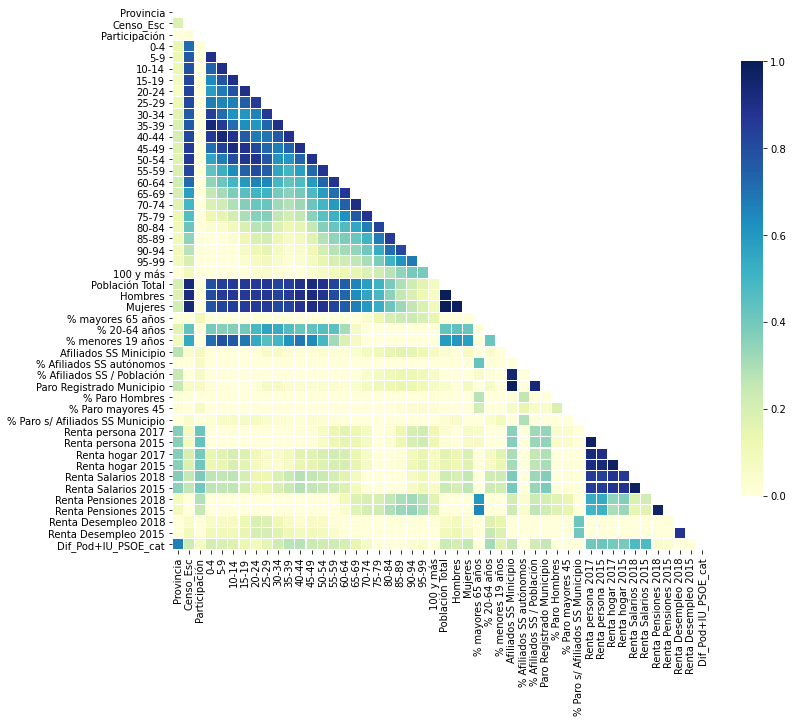

In [ ]:
import seaborn as sns

# Compute the correlation matrix
corr = np.abs(df_train).corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.show()

In [ ]:
df_train.columns

Index(['Provincia', 'Censo_Esc', 'Participación', '0-4', '5-9', '10-14',
       '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54',
       '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94',
       '95-99', '100 y más', 'Población Total', 'Hombres', 'Mujeres',
       '% mayores 65 años', '% 20-64 años', '% menores 19 años',
       'Afiliados SS Minicipio', '% Afiliados SS autónomos',
       '% Afiliados SS / Población', 'Paro Registrado Municipio',
       '% Paro Hombres', '% Paro mayores 45',
       '% Paro s/ Afiliados SS Municipio', 'Renta persona 2017',
       'Renta persona 2015', 'Renta hogar 2017', 'Renta hogar 2015',
       'Renta Salarios 2018', 'Renta Salarios 2015', 'Renta Pensiones 2018',
       'Renta Pensiones 2015', 'Renta Desempleo 2018', 'Renta Desempleo 2015',
       'Dif_Pod+IU_PSOE_cat'],
      dtype='object')

Eliminamos una serie de columnas que hemos visto están muy correlacionadas con otras ya presentes en el dataset de train.

In [ ]:
df_train = df_train.drop(['Renta persona 2017', 'Renta hogar 2017', 'Renta Salarios 2018', 'Renta Pensiones 2018', 'Hombres', 'Mujeres'], axis = 1)

In [ ]:
df_train

,Provincia,Censo_Esc,Participación,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100 y más,Población Total,% mayores 65 años,% 20-64 años,% menores 19 años,Afiliados SS Minicipio,% Afiliados SS autónomos,% Afiliados SS / Población,Paro Registrado Municipio,% Paro Hombres,% Paro mayores 45,% Paro s/ Afiliados SS Municipio,Renta persona 2015,Renta hogar 2015,Renta Salarios 2015,Renta Pensiones 2015,Renta Desempleo 2018,Renta Desempleo 2015,Dif_Pod+IU_PSOE_cat
0,1.611860,1173,0.742540,90.0,68.0,52.0,44.0,57.0,58.0,124.0,180.0,159.0,118.0,91.0,84.0,77.0,91.0,59.0,36.0,35.0,31.0,15.0,3.0,0.0,1472.0,0.183424,0.644022,0.172554,1735.0,0.209222,1.178668,494.0,0.500000,0.425101,0.221624,10517.0,24740.0,7106.00000,2928.000000,347.000000,401.00000,2
1,2.693502,1666,0.839136,53.0,83.0,175.0,194.0,149.0,86.0,84.0,82.0,131.0,264.0,334.0,193.0,103.0,62.0,44.0,41.0,29.0,25.0,11.0,5.0,0.0,2148.0,0.101024,0.663873,0.235102,1795038.0,0.098768,835.678771,263008.0,0.468640,0.502452,0.127795,14907.0,42899.0,14541.00000,1928.000000,263.000000,285.00000,4
2,3.057064,1972,0.776876,72.0,91.0,127.0,162.0,197.0,176.0,118.0,145.0,155.0,192.0,244.0,230.0,188.0,135.0,65.0,46.0,23.0,11.0,7.0,2.0,1.0,2387.0,0.121491,0.689150,0.189359,14003.0,0.121688,5.866359,2335.0,0.443683,0.505353,0.142918,13501.0,36616.0,11175.00000,2757.000000,315.000000,328.00000,4
3,2.693502,1165,0.867811,39.0,60.0,115.0,169.0,90.0,70.0,57.0,64.0,96.0,214.0,207.0,133.0,73.0,44.0,23.0,31.0,19.0,12.0,1.0,1.0,0.0,1518.0,0.086298,0.661397,0.252306,1795038.0,0.098768,1182.501976,263008.0,0.468640,0.502452,0.127795,11793.0,33362.0,10733.00000,1629.000000,250.000000,326.00000,4
4,1.489540,1166,0.782161,163.0,157.0,108.0,91.0,79.0,78.0,181.0,207.0,174.0,149.0,110.0,81.0,48.0,31.0,25.0,5.0,9.0,5.0,2.0,0.0,0.0,1703.0,0.045214,0.650029,0.304756,22263.0,0.205004,13.072813,8111.0,0.396129,0.439403,0.267038,11213.0,34520.0,10881.00000,928.000000,273.000000,261.00000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28968,2.242206,1431,0.676450,81.0,98.0,82.0,88.0,104.0,105.0,112.0,150.0,155.0,134.0,161.0,142.0,88.0,104.0,68.0,50.0,80.0,46.0,26.0,9.0,0.0,1883.0,0.203399,0.611259,0.185343,274.0,0.419708,0.145512,164.0,0.439024,0.585366,0.374429,10710.0,27497.0,8022.00000,2467.000000,327.000000,393.00000,3
28969,1.489540,756,0.832011,86.0,143.0,99.0,75.0,32.0,38.0,41.0,94.0,158.0,114.0,85.0,49.0,36.0,15.0,18.0,11.0,10.0,4.0,0.0,0.0,0.0,1108.0,0.052347,0.583935,0.363718,190733.0,0.149969,172.141697,48013.0,0.450357,0.433778,0.201105,16364.0,52099.0,16157.00000,1214.000000,220.000000,206.00000,3
28970,3.597855,809,0.772559,27.0,28.0,33.0,39.0,37.0,41.0,39.0,46.0,46.0,45.0,82.0,65.0,96.0,114.0,101.0,55.0,37.0,27.0,10.0,4.0,1.0,973.0,0.358684,0.510791,0.130524,169462.0,0.134195,174.164440,48884.0,0.466083,0.434989,0.223883,15871.0,39432.0,7289.67669,2948.440939,289.701322,346.58595,2
28971,2.242206,1716,0.563520,173.0,174.0,109.0,105.0,134.0,253.0,368.0,389.0,325.0,251.0,214.0,193.0,201.0,152.0,103.0,54.0,42.0,22.0,8.0,2.0,0.0,3272.0,0.117054,0.711491,0.171455,7154.0,0.152083,2.186430,2763.0,0.450597,0.402099,0.278612,9279.0,19851.0,6892.00000,1991.000000,549.000000,598.00000,3


Nos deshacemos de las filas con la variable objetivo nan.

In [ ]:
df_train = df_train[df_train['Dif_Pod+IU_PSOE_cat'].notnull()]

In [ ]:
df_train.describe()

,Provincia,Censo_Esc,Participación,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100 y más,Población Total,% mayores 65 años,% 20-64 años,% menores 19 años,Afiliados SS Minicipio,% Afiliados SS autónomos,% Afiliados SS / Población,Paro Registrado Municipio,% Paro Hombres,% Paro mayores 45,% Paro s/ Afiliados SS Municipio,Renta persona 2015,Renta hogar 2015,Renta Salarios 2015,Renta Pensiones 2015,Renta Desempleo 2018,Renta Desempleo 2015,Dif_Pod+IU_PSOE_cat
count,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.00000,28973.000000,28973.000000,28973.000000,28973.000000,2.897300e+04,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000,28973.000000
mean,1.997722,957.111172,0.731855,61.674965,68.719095,63.889261,59.662707,65.116160,74.474033,91.943612,110.347721,108.265262,102.419786,94.376554,82.409599,69.304972,65.151727,53.757390,42.685808,39.194441,23.494993,9.781941,2.160843,0.39962,1289.230490,0.213529,0.607464,0.179007,1.926734e+05,0.248152,158.612658,33579.061697,0.465604,0.484827,0.262446,10864.097341,27995.070089,7289.676690,2948.440939,289.701322,346.585950,1.997722
std,0.947724,433.361408,0.074181,50.095350,52.231981,45.098322,37.910915,37.704972,42.986013,61.523309,77.522786,71.394493,59.913200,50.942787,44.550058,39.889856,41.816372,35.167616,25.681381,22.469277,14.956460,7.561091,2.368732,0.77270,647.428968,0.097472,0.055386,0.060399,4.656782e+05,0.165056,411.190621,66928.788467,0.087630,0.093147,0.114688,3537.866012,9716.565644,3283.971919,1217.592489,116.077388,115.294374,1.423553
min,0.290323,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,5.000000,0.000000,0.234568,0.000000,2.000000e+00,0.000000,0.019417,0.000000,0.000000,0.000000,0.000000,3281.000000,11388.000000,1349.000000,476.000000,71.000000,81.000000,0.000000
25%,1.085502,691.000000,0.691383,30.000000,34.000000,34.000000,34.000000,40.000000,47.000000,55.000000,62.000000,62.000000,64.000000,62.000000,54.000000,45.000000,42.000000,34.000000,27.000000,23.000000,12.000000,4.000000,1.000000,0.00000,898.000000,0.149194,0.579909,0.144000,1.725000e+03,0.131826,1.209270,714.000000,0.440733,0.444783,0.183446,8501.000000,21864.000000,5129.000000,2126.000000,219.000000,278.000000,1.000000
50%,2.221607,953.000000,0.738082,51.000000,57.000000,55.000000,55.000000,62.000000,71.000000,83.000000,97.000000,96.000000,95.000000,89.000000,79.000000,66.000000,62.000000,51.000000,41.000000,38.000000,21.000000,8.000000,2.000000,0.00000,1260.000000,0.203681,0.612565,0.179331,1.306700e+04,0.194237,8.776999,5278.000000,0.459276,0.481749,0.249012,10275.000000,26104.000000,6845.948425,2898.000000,276.000000,343.000000,2.000000
75%,2.693502,1239.000000,0.781250,81.000000,92.000000,86.000000,81.000000,87.000000,98.000000,119.000000,143.000000,142.000000,134.000000,123.000000,108.000000,91.000000,85.000000,70.000000,56.000000,53.000000,32.000000,13.000000,3.000000,1.00000,1674.000000,0.263889,0.641013,0.214669,8.882600e+04,0.310835,75.600130,25306.000000,0.479064,0.509876,0.333333,12322.000000,31446.000000,8555.000000,3515.000000,322.000000,388.000000,3.000000
max,3.597855,3666.000000,1.000000,632.000000,523.000000,456.000000,371.000000,354.000000,558.000000,877.000000,906.000000,729.000000,678.000000,750.000000,1008.000000,1533.000000,2403.000000,2024.000000,1176.000000,402.000000,211.000000,138.000000,42.000000,18.00000,13125.000000,0.764706,1.000000,0.434817,1.795038e+06,1.000000,3011.808725,263008.000000,1.00

Definimos el vector y del train con la variable objetivo, y la X con el resto del dataset.

In [ ]:
y_train = df_train['Dif_Pod+IU_PSOE_cat']

In [ ]:
y_train

0        2
1        4
2        4
3        4
4        4
        ..
28968    3
28969    3
28970    2
28971    3
28972    0
Name: Dif_Pod+IU_PSOE_cat, Length: 28973, dtype: int64

In [ ]:
X_train = df_train.drop(['Dif_Pod+IU_PSOE_cat'], axis = 1)

In [ ]:
X_train.shape

(28973, 41)

In [ ]:
y_train.shape

(28973,)

## Dataset Test

Vamos ahora con el dataset test, al que aplicaremos los mismos procedimientos que al train.

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Proyecto_KeepCoding - Propio/Data/Gen-15-Dic/test_set_RN_pc_PodIU_PSOE_D15.txt',  dtype = strings)

In [ ]:
df_test

,Sección,cod_ccaa,cod_prov,cod_mun,cod_sec,CCAA,Provincia,Municipio,Censo_Esc,Votos_Total,Participación,Nulos,Votos_Válidos,Blanco,V_Cand,PP,PSOE,Cs,UP,IU,VOX,UPyD,MP,CiU,ERC,JxC,CUP,DiL,PNV,Bildu,Amaiur,CC,FA,TE,BNG,PRC,GBai,Compromis,PACMA,Otros,...,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100 y más,Población Total,Hombres,Mujeres,% mayores 65 años,% 20-64 años,% menores 19 años,Afiliados SS Minicipio,% Afiliados SS autónomos,% Afiliados SS / Población,Paro Registrado Municipio,% Paro Hombres,% Paro mayores 45,% Paro s/ Afiliados SS Municipio,Renta persona 2017,Renta persona 2015,Renta hogar 2017,Renta hogar 2015,Renta Salarios 2018,Renta Salarios 2015,Renta Pensiones 2018,Renta Pensiones 2015,Renta Desempleo 2018,Renta Desempleo 2015,dict_res,dict_res_ord,Dif_Pod+IU_PSOE,Dif_Pod+IU_PSOE_cat
0,022015121014109104027,01,41,41091,4109104027,Andalucía,Sevilla,SEVILLA,733,319,0.435198,4,315,1,314,35,153,18,86,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,3,...,80.0,82.0,63.0,63.0,29.0,32.0,21.0,20.0,37.0,21.0,7.0,3.0,0.0,1085.0,550.0,535.0,0.129954,0.628571,0.241475,316318.0,0.111173,291.537327,95926.0,0.446417,0.470686,0.232692,4550.000000,4267.000000,12087.000000,11530.000000,2194.000000,1892.000000,1490.000000,1440.000000,456.000000,490.000000,"{'PP': 35, 'PSOE': 153, 'Cs': 18, 'UP': 86, 'I...","[('PSOE', 153), ('UP', 86), ('PP', 35), ('Cs',...",-0.180952,0
1,022015121122811501009,12,28,28115,2811501009,Galicia,Madrid,POZUELO DE ALARCÓN,790,606,0.767089,0,606,6,600,266,109,94,74,29,11,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,6,...,85.0,75.0,90.0,67.0,80.0,54.0,59.0,45.0,27.0,21.0,5.0,0.0,2.0,1102.0,513.0,589.0,0.193285,0.612523,0.194192,72919.0,0.103416,66.169691,3686.0,0.447640,0.577591,0.048117,12538.000000,12780.000000,37577.000000,40818.000000,10100.000000,9490.000000,3784.000000,3314.000000,155.000000,261.000000,"{'PP': 266, 'PSOE': 109, 'Cs': 94, 'UP': 74, '...","[('PP', 266), ('PSOE', 109), ('Cs', 94), ('UP'...",-0.009901,1
2,022015121174625001003,17,46,46250,4625001003,La Rioja,Valencia,VALENCIA,778,604,0.776350,3,601,1,600,224,68,109,152,31,9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,4,...,91.0,88.0,89.0,70.0,58.0,63.0,40.0,36.0,47.0,24.0,6.0,5.0,1.0,1034.0,519.0,515.0,0.214700,0.637331,0.147969,340249.0,0.151757,329.060928,82560.0,0.454990,0.510041,0.195265,17864.000000,16668.000000,40047.000000,36559.000000,13049.000000,11621.000000,4399.000000,3845.000000,137.000000,236.000000,"{'PP': 224, 'PSOE': 68, 'Cs': 109, 'UP': 152, ...","[('PP', 224), ('UP', 152), ('Cs', 109), ('PSOE...",0.191348,4
3,022015121090810103010,09,08,08101,0810103010,Cataluña,Barcelona,HOSPITALET DE LLOBREGAT (L'),633,437,0.690363,0,437,1,436,50,102,38,170,0,0,0,0,0,45,0,0,11,0,0,0,0,0,0,0,0,0,0,8,13,...,81.0,60.0,57.0,64.0,53.0,58.0,35.0,23.0,16.0,17.0,7.0,0.0,0.0,911.0,448.0,463.0,0.171240,0.642151,0.186608,88826.0,0.128026,97.503842,22763.0,0.493959,0.498572,0.203990,11213.000000,10736.000000,29017.000000,27549.000000,9260.000000,8210.000000,3051.000000,2878.000000,204.000000,344.000000,"{'PP': 50, 'PSOE': 102, 'Cs': 38, 'UP': 170, '...","[('UP', 170), ('PSOE', 102), ('PP', 50), ('ERC...",0.155606,4
4,022015121084719801001,08,47,47198,4719801001,Castilla - La Mancha,Valladolid,VILLACARRALÓN,66,47,0.712121,0,47,0,47,28,9,4,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,5.0,7.0,11.0,2.0,6.0,1.0,4.0,6.0,9.0,7.0,3.0,0.0,0.0,78.0,47.0,31.0,0.384615,0.525641,0.089744,18.0,0.666667,0.230769,4.0,0.500000,0.750000,0.181818,11234.267197,10618.182737,28322.021999,26938.114416,7855.336603,6845.948425,3217.875711,2985.302533,293.331625,347.217589,"{'PP': 28, 'PSOE': 9, 'Cs': 4, 'UP': 1, 'IU': ...","[('PP', 28), ('PSOE', 9), ('Cs', 4), ('IU', 4)...",-0.085106,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
df_test['Dif_Pod+IU_PSOE_cat'].value_counts()

2    1508
1    1452
0    1440
4    1437
3    1407
Name: Dif_Pod+IU_PSOE_cat, dtype: int64

Seleccionamos las columnas importantes...

In [ ]:
df_test = df_test[cols_validas]

... rellenamos los registros nan...

In [ ]:
for item in FillNA_num_mean:
        
    df_test[item].fillna(df_test[item].mean(), inplace=True)

In [ ]:
df_test.describe()

,Censo_Esc,Participación,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80-84,85-89,90-94,95-99,100 y más,Población Total,Hombres,Mujeres,% mayores 65 años,% 20-64 años,% menores 19 años,Afiliados SS Minicipio,% Afiliados SS autónomos,% Afiliados SS / Población,Paro Registrado Municipio,% Paro Hombres,% Paro mayores 45,% Paro s/ Afiliados SS Municipio,Renta persona 2017,Renta persona 2015,Renta hogar 2017,Renta hogar 2015,Renta Salarios 2018,Renta Salarios 2015,Renta Pensiones 2018,Renta Pensiones 2015,Renta Desempleo 2018,Renta Desempleo 2015,Dif_Pod+IU_PSOE_cat
count,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7.244000e+03,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000,7244.000000
mean,952.518498,0.731940,61.310411,67.821872,62.931511,58.857498,64.581055,74.233361,91.710301,109.458437,106.705054,101.059238,93.578984,81.627727,68.704087,64.456918,53.420326,42.915493,39.657277,23.922673,9.946562,2.177437,0.400580,1279.476802,628.064071,651.412731,0.214689,0.607161,0.178149,1.930199e+05,0.249906,160.879178,33420.508564,0.467076,0.484215,0.260320,11492.540076,10851.458834,29386.629479,27937.420599,8250.666401,7262.253630,3202.316050,2956.586107,288.917608,345.685216,1.992960
std,431.834149,0.073994,49.705587,51.731281,44.225680,37.120401,37.456914,43.441728,62.976991,76.269659,69.720582,58.340190,49.311195,43.270512,38.354273,38.250674,32.345083,24.841456,22.749388,15.141865,7.569297,2.298304,0.760668,633.489758,317.270324,319.387742,0.096953,0.055490,0.060156,4.658009e+05,0.166169,417.777442,66833.134145,0.087006,0.092654,0.113799,3612.016927,3510.250905,9931.970736,9621.548605,3389.676259,3250.815113,1339.729424,1201.218458,115.269693,113.727116,1.408375
min,6.000000,0.127487,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,2.000000,0.000000,0.250000,0.000000,2.000000e+00,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,3431.000000,3281.000000,12087.000000,11388.000000,1767.000000,1349.000000,345.000000,476.000000,71.000000,81.000000,0.000000
25%,690.000000,0.691789,30.000000,34.000000,33.000000,34.000000,40.000000,47.000000,54.000000,61.000000,61.000000,63.000000,63.000000,54.000000,44.000000,42.000000,34.000000,26.000000,23.000000,13.000000,5.000000,1.000000,0.000000,895.000000,429.000000,460.000000,0.151163,0.578313,0.144440,1.603000e+03,0.132360,1.144289,696.000000,0.441835,0.444721,0.179025,9159.750000,8546.750000,23246.250000,21984.500000,6102.750000,5150.750000,2297.750000,2154.000000,220.000000,279.000000,1.000000
50%,944.000000,0.737160,51.000000,57.000000,55.000000,54.000000,61.000000,71.000000,82.500000,96.000000,95.000000,94.000000,89.000000,77.000000,65.000000,61.000000,51.000000,42.000000,38.000000,22.000000,9.000000,2.000000,0.000000,1243.000000,603.500000,641.000000,0.206803,0.610768,0.177559,1.189800e+04,0.195762,8.115195,5104.000000,0.460060,0.479496,0.247366,10908.500000,10291.500000,27598.000000,26119.500000,7855.336603,6845.948425,3152.500000,2939.500000,276.000000,341.000000,2.000000
75%,1230.000000,0.780055,80.000000,90.000000,84.000000,79.000000,86.000000,98.000000,119.000000,142.000000,140.000000,133.000000,121.250000,107.000000,90.000000,84.000000,70.000000,57.000000,54.000000,33.000000,14.000000,3.000000,1.000000,1649.000000,812.000000,843.000000,0.263685,0.639785,0.213424,9.046000e+04,0.310345,75.458072,25306.000000,0.479760,0.509196,0.329967,12864.500000

In [ ]:
df_test.dtypes

Provincia                            object
Censo_Esc                             int64
Participación                       float64
0-4                                 float64
5-9                                 float64
10-14                               float64
15-19                               float64
20-24                               float64
25-29                               float64
30-34                               float64
35-39                               float64
40-44                               float64
45-49                               float64
50-54                               float64
55-59                               float64
60-64                               float64
65-69                               float64
70-74                               float64
75-79                               float64
80-84                               float64
85-89                               float64
90-94                               float64
95-99                           

... mapeamos la columna categorical con el mismo criterio que en train...

In [ ]:
for c in categorical:
    df_test[c] = df_test[c].map(mean_map1[c])

In [ ]:
df_test.dtypes

Provincia                           float64
Censo_Esc                             int64
Participación                       float64
0-4                                 float64
5-9                                 float64
10-14                               float64
15-19                               float64
20-24                               float64
25-29                               float64
30-34                               float64
35-39                               float64
40-44                               float64
45-49                               float64
50-54                               float64
55-59                               float64
60-64                               float64
65-69                               float64
70-74                               float64
75-79                               float64
80-84                               float64
85-89                               float64
90-94                               float64
95-99                           

In [ ]:
df_test['Provincia'].describe()

count    7244.000000
mean        1.994683
std         0.941206
min         0.290323
25%         1.085502
50%         2.209412
75%         2.693502
max         3.597855
Name: Provincia, dtype: float64

... eliminamos posteriormente las mismas columnas...

In [ ]:
df_test = df_test.drop(['Renta persona 2017', 'Renta hogar 2017', 'Renta Salarios 2018', 'Renta Pensiones 2018', 'Hombres', 'Mujeres'], axis = 1)

In [ ]:
df_test.shape

(7244, 42)

... y creamos el vector y la matriz X, en este caso de test.

In [ ]:
df_test = df_test[df_test['Dif_Pod+IU_PSOE_cat'].notnull()]

In [ ]:
y_test = df_test['Dif_Pod+IU_PSOE_cat']

In [ ]:
X_test = df_test.drop(['Dif_Pod+IU_PSOE_cat'], axis = 1)

In [ ]:
y_test.shape

(7244,)

In [ ]:
X_test.shape

(7244, 41)

## Relevancia de las features

Al igual que hacemos en otros cuadernos con distintos modelos, examinamos las columnas más relevantes mediante los algos F-test y el Mutual Info.

In [ ]:
from sklearn.feature_selection import f_regression, mutual_info_regression

In [ ]:
columnas = X_train.columns

In [ ]:
X_train_v = X_train.values
y_train_v = y_train.values

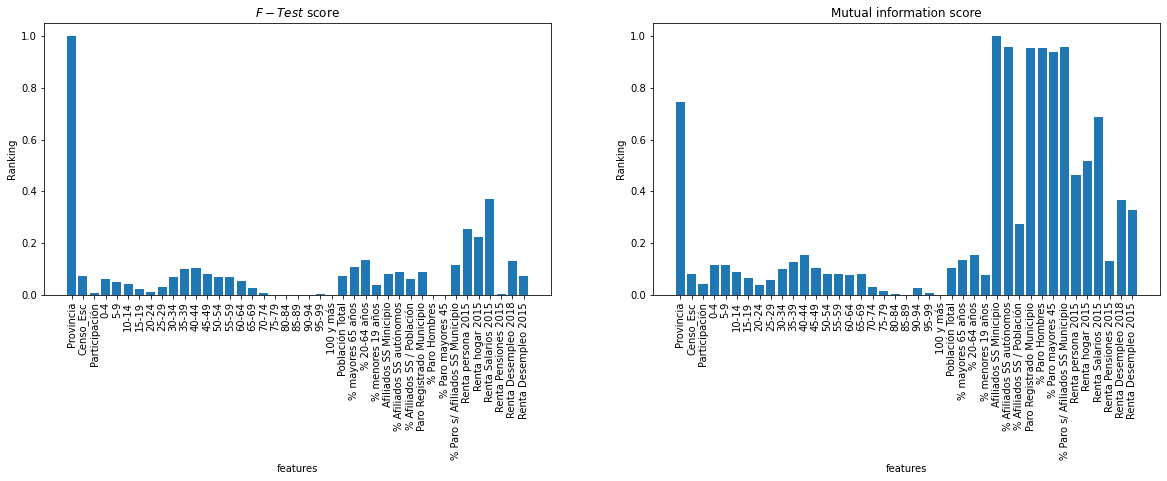

In [ ]:
y = y_train_v    # nos quedamos con la 1ª columna, price
X = X_train_v      # nos quedamos con el resto

feature_names = columnas


# do calculations
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# do some plotting
plt.figure(figsize=(20, 5))

plt.subplot(1,2,1)
plt.bar(range(X.shape[1]),f_test,  align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('$F-Test$ score')

plt.subplot(1,2,2)
plt.bar(range(X.shape[1]),mi, align="center")
plt.xticks(range(X.shape[1]),feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Ranking')
plt.title('Mutual information score')

plt.show()

Se observa una mayor relevancia de los datos del paro y de rentas, incluso mayor que la provincia en el caso del mutual information.

Agrupamos las columnas de mayor MI por si hiciese falta más adelante.

In [ ]:
columnas_MI = columnas[mi > 0.35]

In [ ]:
columnas_MI

Index(['Provincia', 'Afiliados SS Minicipio', '% Afiliados SS autónomos',
       'Paro Registrado Municipio', '% Paro Hombres', '% Paro mayores 45',
       '% Paro s/ Afiliados SS Municipio', 'Renta persona 2015',
       'Renta hogar 2015', 'Renta Salarios 2015', 'Renta Desempleo 2018'],
      dtype='object')

In [ ]:
len(columnas_MI)

11

## Modelización

Ahora ya podemos pasar a modelar. Cargamos las librerías habituales de las redes neuronales.

In [ ]:
from tensorflow import keras

from tensorflow.keras.models import Sequential, Model

from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPool2D, Activation, Dropout, Dense, Flatten, Input, concatenate

from sklearn.preprocessing import MinMaxScaler

Categorizamos según indica Keras, creando una matriz de cinco columnas, tanto en train como en test.

In [ ]:
y_train_cat = keras.utils.to_categorical(y_train)

In [ ]:
y_train_cat.shape

(28973, 5)

In [ ]:
y_test_cat = keras.utils.to_categorical(y_test)

In [ ]:
y_test_cat.shape

(7244, 5)

Ahora necesitamos normalizar, cosa que hacemos mediante los métodos de SKlearn.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
cs = MinMaxScaler()

In [ ]:
X_train_norm = cs.fit_transform(X_train)
X_test_norm = cs.transform(X_test)

In [ ]:
X_train_norm

array([[0.39955381, 0.31996727, 0.74254049, ..., 0.35423288, 0.35612903,
        0.40201005],
       [0.72657769, 0.45444626, 0.83913565, ..., 0.20976596, 0.24774194,
        0.25628141],
       [0.83649717, 0.53791598, 0.77687627, ..., 0.32952904, 0.31483871,
        0.31030151],
       ...,
       [1.        , 0.22067649, 0.77255871, ..., 0.35718592, 0.28219525,
        0.33365069],
       [0.59013285, 0.46808511, 0.56351981, ..., 0.21886738, 0.61677419,
        0.64949749],
       [0.05426283, 0.22967812, 0.55819477, ..., 0.13695464, 0.66193548,
        0.60427136]])

Y por fin comenzamos definiendo la primera de las redes neuronales, bastante sencilla, con los capas iniciales y la última softmax por estar en clasificación.

In [ ]:
def model_RN(dim, regress = False):
  model = Sequential()
  model.add(Dense(60, input_dim = dim, activation='relu'))
  #model.add(Dropout(0.2))
  #model.add(Dense(24, activation = 'relu'))
  model.add(Dropout(0.15))
  model.add(Dense(8, activation = 'relu'))


  if regress:
    model.add(Dense(1, activation = 'linear'))
  else:
    model.add(Dense(5, activation = 'softmax'))

  return model

In [ ]:
dim = X_train_norm.shape[1]

In [ ]:
dim

41

Instanciamos la red neuronal

In [ ]:
model_RN = model_RN(dim, regress = False)

Definimos en optimizador

In [ ]:
opt = keras.optimizers.Adam(lr = 0.001, decay = 0.001/50)

In [ ]:
opt

Instanciamos el modelo, con la métrica del accuracy por estar en clasificación.

In [ ]:
model_RN.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

Tenemos ahora un modelo bastante sencillo, con poco más de 3.000 parámetros.

In [ ]:
model_RN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 60)                2520      
_________________________________________________________________
dropout (Dropout)            (None, 60)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 488       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 45        
Total params: 3,053
Trainable params: 3,053
Non-trainable params: 0
_________________________________________________________________


Y hacemos el fit del modelo. Vemos que el accuracy en validation (test), alcanza el 53%, similar al de otros modelos con este tipo de dataset electoral. No parece haber habido overfitting. Este modelo pensamos que nos podría valer.

In [ ]:
model_RN.fit(x = X_train_norm,
              y= y_train_cat,
              validation_data = (X_test_norm, y_test_cat),
              verbose = 1,
              epochs = 50,
              batch_size = 40)

Epoch 1/50
725/725 [==============================] - 3s 2ms/step - loss: 1.3083 - accuracy: 0.4137 - val_loss: 1.1918 - val_accuracy: 0.4604
Epoch 2/50
725/725 [==============================] - 1s 2ms/step - loss: 1.1665 - accuracy: 0.4806 - val_loss: 1.1479 - val_accuracy: 0.4919
Epoch 3/50
725/725 [==============================] - 1s 2ms/step - loss: 1.1352 - accuracy: 0.4994 - val_loss: 1.1269 - val_accuracy: 0.5037
Epoch 4/50
725/725 [==============================] - 2s 2ms/step - loss: 1.1154 - accuracy: 0.5095 - val_loss: 1.1124 - val_accuracy: 0.5070
Epoch 5/50
725/725 [==============================] - 1s 2ms/step - loss: 1.1051 - accuracy: 0.5136 - val_loss: 1.1070 - val_accuracy: 0.5108
Epoch 6/50
725/725 [==============================] - 2s 2ms/step - loss: 1.0979 - accuracy: 0.5139 - val_loss: 1.0963 - val_accuracy: 0.5126
Epoch 7/50
725/725 [==============================] - 1s 2ms/step - loss: 1.0905 - accuracy: 0.5154 - val_loss: 1.0973 - val_accuracy: 0.5148
Epoch 

Como mencionamos al principio, modelizamos con otra red neuronal, en este caso algo más complicada, con 4 capas dense además de la última softmax.

In [ ]:
def model_RN_alt(dim, regress = False):
  model = Sequential()
  model.add(Dense(120, input_dim = dim, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(40, activation = 'relu'))
  model.add(Dropout(0.15))
  model.add(Dense(20, activation = 'relu'))
  model.add(Dropout(0.15))
  model.add(Dense(10, activation = 'relu'))


  if regress:
    model.add(Dense(1, activation = 'linear'))
  else:
    model.add(Dense(5, activation = 'softmax'))

  return model

Ponemos los mismos hiperparámetros; estamos ante un modelo de unos 10 mil parámetros.

In [ ]:
dim = X_train_norm.shape[1]
model_RN_alt = model_RN_alt(dim, regress = False)
opt = keras.optimizers.Adam(lr = 0.001, decay = 0.001/50)

In [ ]:
model_RN_alt.compile(optimizer=opt, loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
model_RN_alt.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 120)               5040      
_________________________________________________________________
dropout_8 (Dropout)          (None, 120)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 40)                4840      
_________________________________________________________________
dropout_9 (Dropout)          (None, 40)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 20)                820       
_________________________________________________________________
dropout_10 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 10)               

Y hacemos el fit. Lo cierto es que los resultados son bastante similares, quizás solo un poco mejores, con accuracies del 54% en esta ocasión: No parece que la complicación del modelo merezca realmente la pena. Quizás por sencillez nos quedaríamos con el primer modelo.

In [ ]:
model_RN_alt.fit(x = X_train_norm,
              y= y_train_cat,
              validation_data = (X_test_norm, y_test_cat),
              verbose = 1,
              epochs = 80,
              batch_size = 40)

Epoch 1/80
725/725 [==============================] - 3s 3ms/step - loss: 1.2750 - accuracy: 0.4295 - val_loss: 1.1694 - val_accuracy: 0.4833
Epoch 2/80
725/725 [==============================] - 2s 3ms/step - loss: 1.1511 - accuracy: 0.4909 - val_loss: 1.1107 - val_accuracy: 0.5008
Epoch 3/80
725/725 [==============================] - 2s 3ms/step - loss: 1.1234 - accuracy: 0.5029 - val_loss: 1.0968 - val_accuracy: 0.5104
Epoch 4/80
725/725 [==============================] - 2s 3ms/step - loss: 1.1055 - accuracy: 0.5109 - val_loss: 1.0967 - val_accuracy: 0.5156
Epoch 5/80
725/725 [==============================] - 2s 3ms/step - loss: 1.0970 - accuracy: 0.5139 - val_loss: 1.0855 - val_accuracy: 0.5135
Epoch 6/80
725/725 [==============================] - 2s 3ms/step - loss: 1.0934 - accuracy: 0.5149 - val_loss: 1.0841 - val_accuracy: 0.5156
Epoch 7/80
725/725 [==============================] - 2s 3ms/step - loss: 1.0827 - accuracy: 0.5221 - val_loss: 1.0757 - val_accuracy: 0.5233
Epoch 